In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [2]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    
    return np.exp(-0.5*np.power((H-mu)/sigma,2))

second_prior = np.vectorize(gaussian_prior)


def third_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return np.exp(np.power(H,2)*(-1000))+np.exp(np.power(H-1,2)*(-1000))

third_prior = np.vectorize(third_prior)

### Bonus point

Why do we need to use np.vectorize here?

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [3]:
H = np.linspace(0, 1, 1000, dtype=np.float64)

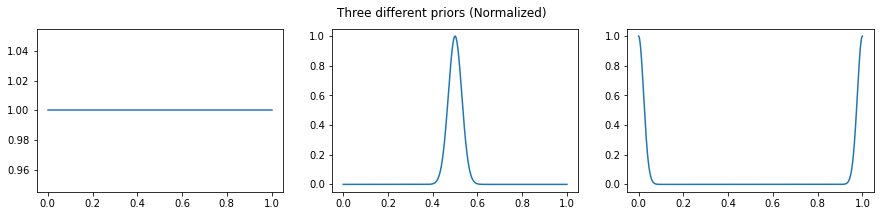

In [4]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.subplot(1,3,1)
plt.plot(H,first_prior(H))

plt.subplot(1,3,2)
plt.plot(H,second_prior(H))

plt.subplot(1,3,3)
plt.plot(H,third_prior(H))

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [5]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [6]:
iprior=[first_prior,second_prior,third_prior]
def posterior(data,H,iprior):
    ones = np.count_nonzero(data == 1)
    zeros = len(data)-ones

    return (np.power(H,ones))*(np.power(1-H,zeros))*iprior(H)

<ipython-input-7-f2a8e7532cf3>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(H,p/max(p))
<ipython-input-7-f2a8e7532cf3>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(H,p/max(p))
<ipython-input-7-f2a8e7532cf3>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(H,p/max(p))
<ipython-input-7-f2a8e7532cf3>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(H,p/max(p))
<ipython-input-7-f2a8e7532cf3>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(H,p/max(p))
<ipython-input-7-f2a8e7532cf3>:7: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(H,p/max(p))


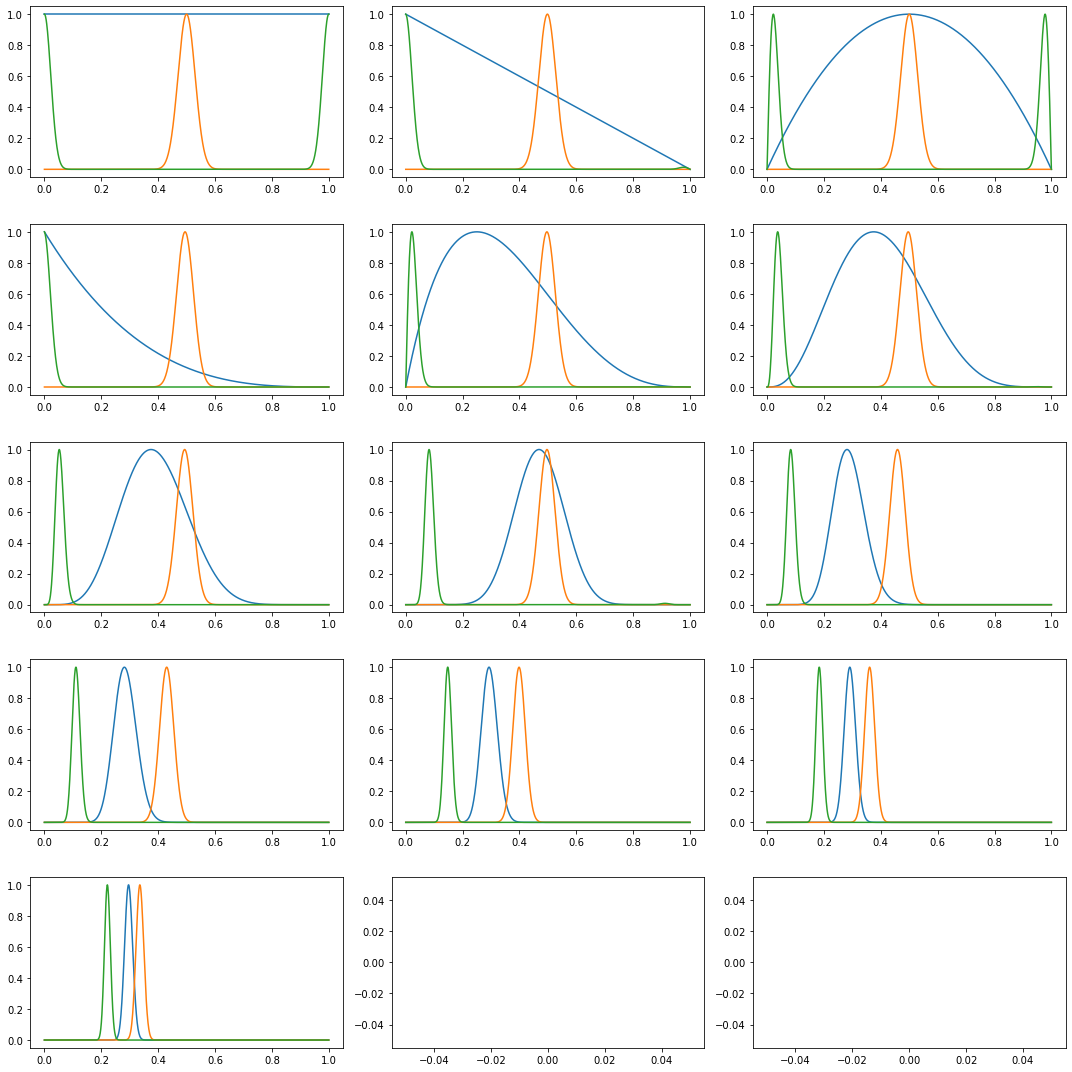

In [7]:
plt.figure(figsize=(15, 15))

for i in range(15):
    plt.subplot(5,3,i+1)
    for j in range(3):
        p=posterior(data[i],H,iprior[j])
        plt.plot(H,p/max(p))
    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [8]:
def raw_moment(data,n):
    return (np.sum(data**n))/len(data)

## (b)

Write a function to calculate central moments of a given distribution

In [9]:
def central_moment(data,n):
    return np.sum((data-np.mean(data))**n)/len(data)

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [10]:
binomial = np.random.binomial(30,0.7,10**6)
poisson = np.random.poisson(2.1,10**6)
normal = np.random.normal(2.1,0.3,10**6)

A=[binomial, poisson, normal]
Name=["binomial", "poisson", "normal"]
for i in range(3):
    print("\n",Name[i],"\n")
    for j in range(1,4):
        print( "raw",j,":",raw_moment(A[i],j))
        print( "central",j,":",central_moment(A[i],j))
    


 binomial 

raw 1 : 20.996479
central 1 : -7.808012014720589e-16
raw 2 : 447.155921
central 2 : 6.303790602558999
raw 3 : 1060.950407
central 3 : -2.5297200162137945

 poisson 

raw 1 : 2.099626
central 1 : -3.020659278263338e-16
raw 2 : 6.506844
central 2 : 2.0984146601240004
raw 3 : 24.566002
central 3 : 2.092291201300971

 normal 

raw 1 : 2.100315785537793
central 1 : -6.537668184591893e-16
raw 2 : 4.5012717886660605
central 2 : 0.0899453896868258
raw 3 : 9.831925328928389
central 3 : 5.692605949245019e-06


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [11]:
from scipy import stats

In [12]:
A=[binomial, poisson, normal]
Name=["binomial", "poisson", "normal"]
for i in range(3):
    print("\n",Name[i],"\n")
    for j in range(1,4):
        print("moment",j,":",stats.moment(A[i],j))
print("\n","this function calculate central moments")


 binomial 

moment 1 : 0.0
moment 2 : 6.303790602558999
moment 3 : -2.5297200162137936

 poisson 

moment 1 : 0.0
moment 2 : 2.0984146601240004
moment 3 : 2.092291201300971

 normal 

moment 1 : 0.0
moment 2 : 0.0899453896868258
moment 3 : 5.692605949245104e-06

 this function calculate central moments


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [13]:
import pandas as pd

In [15]:
data_1 = pd.read_csv("data.txt", sep = "\t")
pd.DataFrame(data_1)

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.